# Modeling Non-Linear Patterns with Activation Functions

¡Bienvenido de nuevo al desafío de las entregas!

En el laboratorio anterior, tu modelo lineal simple funcionó bien con los datos de solo bicicletas, pero tuvo dificultades cuando se añadieron los coches. La razón fue simple: tu modelo solo podía aprender **líneas rectas**, pero los nuevos datos seguían una **curva**. Como viste en las clases, simplemente añadir más neuronas lineales no es la solución; la salida del modelo seguiría siendo una línea recta.

Aquí es donde entran las **non-linear activation functions** (funciones de activación no lineales). Ellas son la clave para desbloquear la capacidad de tu modelo para aprender los patrones complejos y curvos que se encuentran en los datos del mundo real. En este laboratorio, usarás la función de activación más popular y potente, **ReLU (Rectified Linear Unit)**, para construir un modelo más sofisticado. Al añadir una activación ReLU, tu modelo puede crear múltiples "curvas" o pliegues que pueden aproximarse a la compleja curva del tiempo de entrega.

En este laboratorio, tú vas a:

* Preparar los datos combinados de entregas en bicicleta y coche, aplicando esta vez una técnica llamada **normalization** (normalización) para ayudar a que tu modelo se entrene de manera más efectiva.
* Construir una red neuronal *no lineal* usando la función de activación **ReLU**.
* Entrenar tu nuevo modelo para aprender la relación compleja y curva de los datos.
* Predecir los tiempos de entrega usando tu nuevo modelo y ver si finalmente puede tener éxito donde el modelo lineal falló.

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils

## Preparing the Non-Linear Data

Comienza cargando el mismo conjunto de datos que causó problemas al final del laboratorio anterior. Estos son los datos combinados para las entregas tanto en bicicleta como en coche.

In [2]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

* Como verás al ejecutar el código a continuación, el gráfico de los datos sigue un patrón non-linear (no lineal).

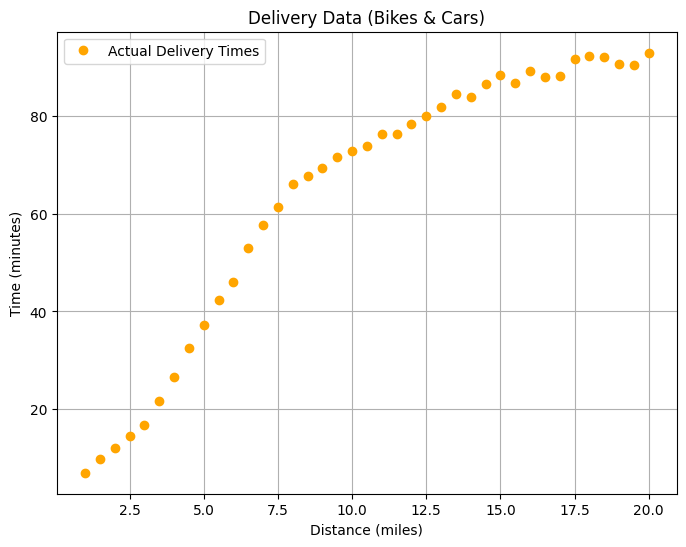

In [3]:
helper_utils.plot_data(distances, times)

### A New Step: Normalizing the Data

Antes de construir tu modelo, aplicarás un paso rápido de preparación de datos llamado **normalization** (normalización). Esta es una técnica estándar que hace que el proceso de entrenamiento sea más estable y efectivo al ajustar la escala de los datos. Este ajuste ayuda a evitar que los valores de distancia grandes dominen el proceso de aprendizaje y mantiene los gradientes estables durante el entrenamiento. Explorarás este tema con mayor detalle en un módulo posterior.

* Calcularás la media (mean) y la desviación estándar (standard deviation) para los tensores `distances` y `times`.
* Luego aplicarás una estandarización a cada tensor usando su respectiva media y desviación estándar, lo que creará nuevos tensores normalizados llamados `distances_norm` y `times_norm`.
* Esta técnica específica se llama **standardization** (estandarización o normalización z-score), la cual convierte los datos originales de `1.0 a 20.0 millas` y aproximadamente `7 a 93 minutos` a una nueva escala normalizada.

In [4]:
# Calculate the mean and standard deviation for the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and standard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distances.
distances_norm = (distances - distances_mean) / distances_std

# Apply standardization to the times.
times_norm = (times - times_mean) / times_std

* Notarás que los ejes ahora muestran los datos en una nueva escala normalizada, con la distancia variando aproximadamente de `-1.7 a 1.7` y el tiempo de `-2.0 a 1.0`.
* A pesar de este cambio en la escala, el patrón curvo subyacente de los datos permanece exactamente igual.

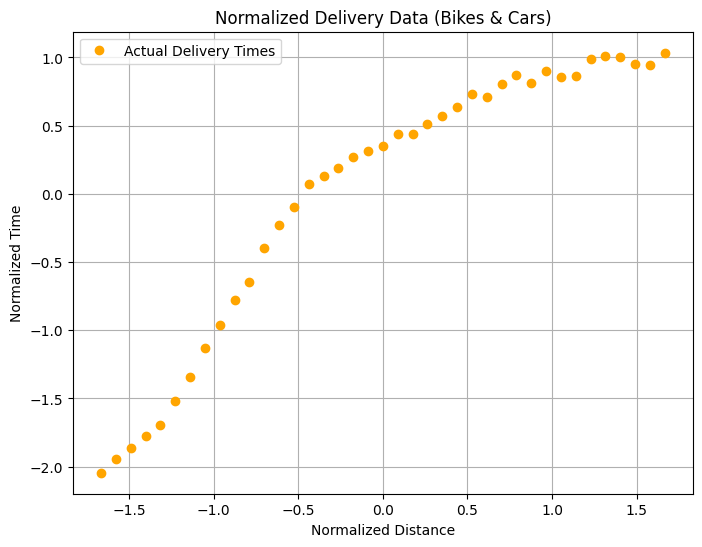

In [5]:
helper_utils.plot_data(distances_norm, times_norm, normalize=True)

## Building the Non-Linear Model

Con tus datos normalizados listos, ahora puedes construir un modelo capaz de aprender su patrón curvo. Definirás la arquitectura del modelo, que ahora incluye una función de activación `ReLU`. Esta estructura es lo que le da a tu modelo la capacidad de aprender relaciones no lineales (non-linear).

* `nn.Linear(1, 3)`: Esta es tu **primera capa oculta (hidden layer)**. Consta de tres neuronas, cada una de las cuales recibe una característica de entrada (la distancia normalizada). Esta capa transforma el único valor de entrada en tres valores separados.
* `nn.ReLU()` aplica la función de activación ReLU a la salida de cada una de las tres neuronas de la capa oculta. Este es el paso no lineal crucial que permite a tu modelo crear "curvas" y aprender patrones complejos en lugar de solo líneas rectas.
* `nn.Linear(3, 1)`: Esta es tu **capa de salida (output layer)**. Toma los tres valores activados del paso anterior como entrada y los combina para producir una única salida final, que es tu tiempo de entrega (normalizado) predicho.

Esto crea una red neuronal con 1 capa oculta que contiene 3 neuronas.

In [11]:
# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(27)

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

## Training

* Define la loss function (función de pérdida) y el optimizer (optimizador) para el entrenamiento.

In [12]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Con tu modelo y las herramientas de entrenamiento listos, puedes comenzar el proceso de entrenamiento.

* Ejecutarás el training loop durante `3000` epochs (más que en el Lab 1 porque el patrón no lineal es más complejo y requiere más entrenamiento). Esto entregará repetidamente los datos *normalizados* a tu modelo, medirá el error y ajustará los parámetros del modelo para mejorar sus predicciones.
* La segunda mitad del código incluye un gráfico en vivo (live plot), lo que te permite observar en tiempo real cómo la línea de predicción de tu modelo se adapta para ajustarse a la curva de los datos. El gráfico en vivo te ayuda a ver cómo tu modelo aprende gradualmente a ajustarse a la curva, comenzando con un ajuste deficiente y mejorando con el tiempo.

**NOTA IMPORTANTE**: A medida que el gráfico se actualiza en tiempo real durante el entrenamiento, podrías notar un efecto de parpadeo (flickering). Este es el comportamiento esperado de la visualización en vivo y no es un problema de tu pantalla.

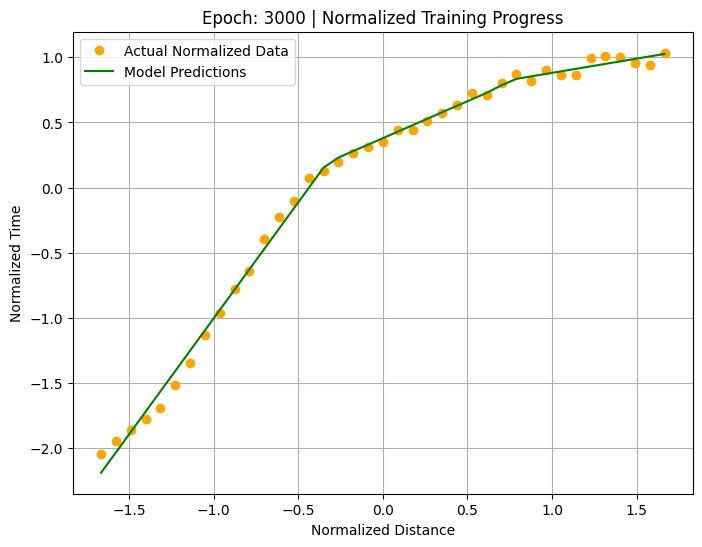


Training Complete.

Final Loss: 0.00314371008425951


In [13]:
# Training loop
for epoch in range(3000):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances_norm)
    # Calculate the loss
    loss = loss_function(outputs, times_norm)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()

    # Create a live plot every 50 epochs
    if (epoch + 1) % 50 == 0:
        helper_utils.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=distances_norm,
            times_norm=times_norm
        )

print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")

## Checking the Final Fit 

Ahora que el entrenamiento ha terminado, visualizarás el resultado.

* Graficarás la curva final predicha por tu modelo frente a los puntos de datos originales.
* Esto te permite inspeccionar visualmente qué tan bien aprendió tu modelo no lineal (non-linear model) a ajustarse al patrón complejo de los datos.

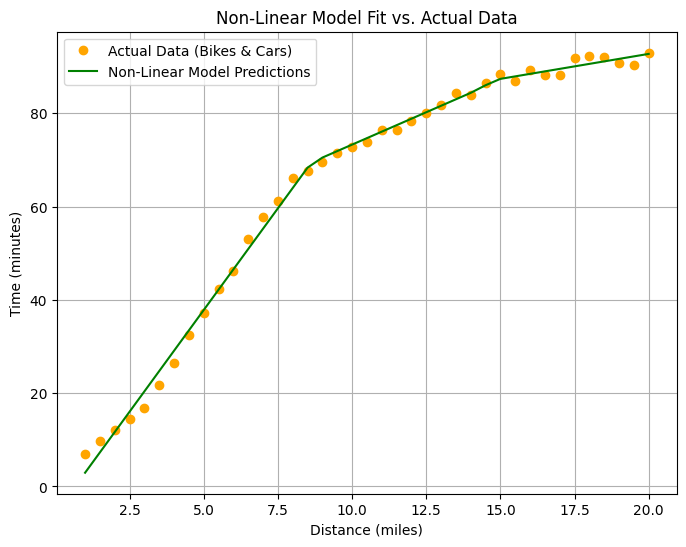

In [14]:
helper_utils.plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

<br>

¡Felicidades! ¡Has entrenado con éxito tu primera red neuronal **non-linear** (no lineal) en PyTorch!

Donde el modelo lineal simple del laboratorio pasado falló, tu nuevo modelo con una función de activación `ReLU` tuvo éxito. Como puedes ver en el gráfico, tu modelo aprendió a capturar la relación compleja y curva en los datos combinados de entregas en bicicleta y coche.

## Making a Prediction

Con tu modelo no lineal completamente entrenado, ahora puedes usarlo para realizar una predicción para una nueva entrega. El proceso es un poco diferente ahora porque tu modelo fue entrenado con datos *normalizados* (**normalized**).

* Primero, tomarás la nueva distancia de entrada y la **normalizarás** usando la misma media y desviación estándar de tus datos de entrenamiento. Este paso es CRÍTICO: tu modelo no tiene idea de las escalas originales (millas y minutos). Solo entiende la escala normalizada con la que fue entrenado.
* Después de que el modelo proporcione su predicción, debes **desnormalizar** (de-normalize) la salida. Esto convierte la predicción de su escala normalizada de vuelta a un valor comprensible en minutos.
* Finalmente, el código utiliza este tiempo predicho real para ejecutar la lógica de decisión. Para esta predicción, asume que tu empresa ahora promete entregas en un máximo de 45 minutos (en lugar de los 30 minutos del Lab 1) y quiere saber qué vehículo utilizar.

In [15]:
distance_to_predict = 5.1

In [16]:
# Use the torch.no_grad() context manager for efficient prediction
with torch.no_grad():
    # Normalize the input distance
    distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_norm = (distance_tensor - distances_mean) / distances_std
    
    # Get the normalized prediction from the model
    predicted_time_norm = model(new_distance_norm)
    
    # De-normalize the output to get the actual time in minutes
    predicted_time_actual = (predicted_time_norm * times_std) + times_mean
    
    # --- Decision Making Logic ---
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")
    
    # First, check if the delivery is possible within the 45-minute timeframe
    if predicted_time_actual.item() > 45:
        print("\nDecision: Do NOT promise the delivery in under 45 minutes.")
    else:
        # If it is possible, then determine the vehicle based on the distance
        if distance_to_predict <= 3:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (<= 3 miles), use a bike.")
        else:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (> 3 miles), use a car.")

Prediction for a 5.1-mile delivery: 38.7 minutes

Decision: Yes, delivery is possible. Since the distance is 5.1 miles (> 3 miles), use a car.


## Conclusion

Ahora has construido y entrenado tanto un modelo lineal simple como un modelo no lineal más potente en PyTorch. En este laboratorio, viste de primera mano cómo añadir una función de activación no lineal como **ReLU** le dio a tu modelo la capacidad de tener éxito donde el modelo lineal había fallado.

Has ido más allá del ajuste de líneas rectas y ahora puedes capturar los patrones complejos y curvos que son comunes en los datos del mundo real. También aprendiste una técnica práctica de preparación de datos, la normalización (normalization), que ayuda a que el proceso de entrenamiento sea más estable y efectivo.

Con estas habilidades fundamentales para construir arquitecturas, preparar datos y entrenar modelos, estás bien preparado para el siguiente paso. En el próximo módulo, partirás de esta base para abordar nuevos tipos de problemas, como la clasificación (classification), y profundizarás aún más en la mecánica de cómo aprenden las redes neuronales.